### Adarsh Anand, 2003101, CSE


1. draw/design a neural network where input size is smaller than the output
   size
   • Check the performance and tell me a real situation for the same


In [20]:
# !pip install tensorflow




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 12        
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000

3/3 [==============================] - 1s 68ms/step - loss: 1.1016 - val_loss: 1.3552
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0978 - val_loss: 1.3503
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0933 - val_loss: 1.3457
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0902 - val_loss: 1.3412
Epoch 5/1000
3/3

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

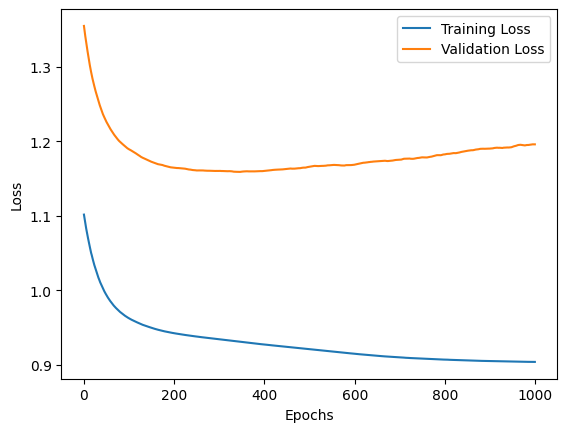

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

input_size = 5
output_size = 10

# Create Neural Network with 1 hidden layer with 2 neurons
model = models.Sequential()
model.add(layers.Dense(2, input_shape=(input_size,), activation='relu'))
model.add(layers.Dense(output_size))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print a summary of the model
model.summary()

# Train the model and plot the loss
x_train = tf.random.normal([100, input_size])
y_train = tf.random.normal([100, output_size])

history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In this particular instance, the input dimension is 5, and the output dimension is 10. The network is compelled to learn a condensed representation of the input due to the presence of an intermediate layer of size 5, which acts as a bottleneck.

This type of architecture can be applied in real-world situations such as image compression. For example, if you need to efficiently transmit or store high-resolution images, an autoencoder can be utilized to learn a compact representation of the image, ensuring the preservation of crucial features. The compressed representation can then be transmitted or stored, and when necessary, the original image can be reconstructed from this representation. This method is employed in image compression standards like JPEG and JPEG2000.


2. draw/ design a neural network where the learning rate is scaled down by a
   factor of 20
   • Show the training accuracy curve for the same


Epoch 1/5000
32/32 [==============================] - 1s 1ms/step - loss: 4.2483 - accuracy: 0.5170 - lr: 0.0100
Epoch 2/5000
32/32 [==============================] - 0s 2ms/step - loss: 5.5991 - accuracy: 0.4110 - lr: 0.0100
Epoch 3/5000
32/32 [==============================] - 0s 958us/step - loss: 4.7294 - accuracy: 0.1910 - lr: 0.0100
Epoch 4/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.1225 - accuracy: 0.2080 - lr: 0.0100
Epoch 5/5000
32/32 [==============================] - 0s 1ms/step - loss: 16.7248 - accuracy: 0.2110 - lr: 0.0100
Epoch 6/5000
32/32 [==============================] - 0s 2ms/step - loss: 37.3754 - accuracy: 0.2070 - lr: 0.0100
Epoch 7/5000
32/32 [==============================] - 0s 1ms/step - loss: 64.4660 - accuracy: 0.1680 - lr: 0.0100
Epoch 8/5000
32/32 [==============================] - 0s 2ms/step - loss: 97.4955 - accuracy: 0.1930 - lr: 0.0100
Epoch 9/5000
32/32 [==============================] - 0s 2ms/step - loss: 109.8130 - accur

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

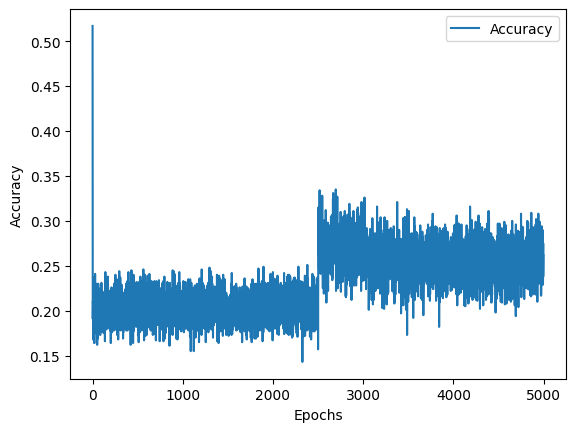

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np

# Define input and output sizes
input_size = 10
output_size = 5

# Define a simple neural network with fewer hidden layer neurons
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(input_size,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(output_size, activation='softmax')
])

# Compile the model with an initial learning rate
initial_learning_rate = 0.01
model.compile(optimizer=optimizers.Adam(lr=initial_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scaling factor
lr_scale_factor = 20
num_epochs = 5000

# Define a learning rate schedule function that changes the learning rate once by 20
def lr_schedule(epoch):
    return initial_learning_rate / (lr_scale_factor ** (epoch // (num_epochs / 2)))

# Create a Learning Rate Scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Dummy data for training
X_train = np.random.rand(1000, input_size)
y_train = np.random.randint(2, size=(1000, output_size))

# Train the model with the learning rate scheduler
history = model.fit(X_train, y_train, epochs=num_epochs, callbacks=[lr_scheduler])

# Plot the training accuracy curve
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.show()


3. draw/design a neural network and compare the performance where first
   the model is trained by D dataset and second time tha same model is
   trained by 100x D dataset. Note, all the other parameters and
   hyperparameters should be kept same.
   • Show the learning curve with min training loss and max test accuracy for 5000 epoch


<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Training Loss Comparison')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Training Loss')

<Axes: >

Text(0.5, 1.0, 'Test Accuracy Comparison')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Test Accuracy')

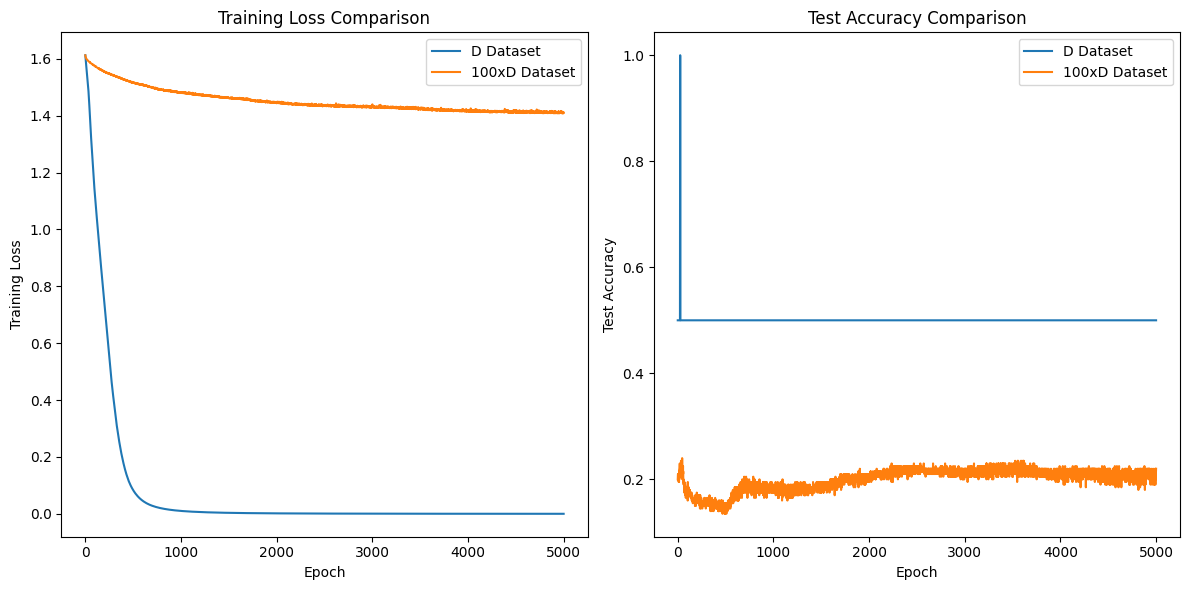

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Function to create a simple neural network model with smallest network size
def create_model(input_size):
    model = models.Sequential([
        layers.Dense(16, activation='relu', input_shape=(input_size,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to generate random dummy data
def generate_data(num_samples, input_size, num_classes=5):
    X = np.random.rand(num_samples, input_size)
    y = tf.keras.utils.to_categorical(np.random.randint(num_classes, size=num_samples), num_classes=num_classes)
    return X, y

# Training on dataset D
input_size = 5
model_D = create_model(input_size)
D = 10
num_epochs = 5000

X_D, y_D = generate_data(D, input_size)
history_D = model_D.fit(X_D, y_D, epochs=num_epochs, validation_split=0.2, verbose=0)

# Training on 100xD dataset
model_100xD = create_model(input_size)

X_100xD, y_100xD = generate_data(100 * D, input_size)
history_100xD = model_100xD.fit(X_100xD, y_100xD, epochs=num_epochs, validation_split=0.2, verbose=0)

# Plotting learning curves
plt.figure(figsize=(12, 6))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(history_D.history['loss'], label='D Dataset')
plt.plot(history_100xD.history['loss'], label='100xD Dataset')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

# Plotting test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_D.history['val_accuracy'], label='D Dataset')
plt.plot(history_100xD.history['val_accuracy'], label='100xD Dataset')
plt.title('Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()